# DATA512 Final Project
# Hasnah Said

In my extednded analysis, the research questions I will answer for Fairfield County, CT are:
1. What is the correlation between vaccination (2020-12-07) and: 
    * Rate of infection
    * Hospitalization
    * Death
2. Is there a correlation between unemployment rates and COVID-19 cases in Fairfield County, CT from 2020-2-01 to 2021-10-1?

The findings from this analysis can be found in the final report in the same repository.

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from numpy import mean
from numpy import std


import warnings
warnings.filterwarnings('ignore')

## Read in data

In [2]:
confirmed_cases = pd.read_csv("raw_data/CONVENIENT_us_confirmed_cases.csv")
vaccination = pd.read_csv("raw_data/COVID-19_Vaccinations_in_the_United_States_County.csv")
hosp = pd.read_csv("raw_data/COVID-19_Cases__Hospitalizations__and_Deaths__By_County_.csv")
death = pd.read_csv("raw_data/CONVENIENT_us_deaths.csv")
mask = pd.read_csv('raw_data/mask_mandates_by_county.csv')
ff_unemploymnet_rate = pd.read_csv('raw_data/ff_unemployment.csv')
mask_use = pd.read_csv('raw_data/mask_use_by_county.csv', index_col=False)
a4_df = pd.read_csv('raw_data/Fairfield_Cases_Masks.csv')

## Preprocess data

In [3]:
# filter out fairfield county from confirmed cases dataset, rename columns, and convert date column to datetime
ff_cc = confirmed_cases[['Province_State','Connecticut']]
ff_cc = ff_cc.rename(columns={'Province_State': 'date', 'Connecticut':'confirmed_cases'})
ff_cc = ff_cc.drop(labels=0, axis=0)
ff_cc['confirmed_cases'] = pd.to_numeric(ff_cc['confirmed_cases'])
ff_cc['date'] = pd.to_datetime(ff_cc['date'])
ff_cc.head()

,date,confirmed_cases
1,2020-01-23,0.0
2,2020-01-24,0.0
3,2020-01-25,0.0
4,2020-01-26,0.0
5,2020-01-27,0.0


In [4]:
# filter out fairfield county vaccination data, rename date colum, convert date column and drop unneeded columns
ff_vaccination = vaccination.loc[vaccination['FIPS'] == '09001']
ff_vaccination = ff_vaccination.rename(columns={"Date": "date"})
ff_vaccination['date'] = pd.to_datetime(ff_vaccination['date'])
ff_vaccination = ff_vaccination.drop(['FIPS', 'MMWR_week', 'Recip_County', 'Recip_State','Completeness_pct', 'Administered_Dose1_Recip',
       'Administered_Dose1_Pop_Pct', 'Administered_Dose1_Recip_12Plus',
       'Administered_Dose1_Recip_12PlusPop_Pct',
       'Administered_Dose1_Recip_18Plus',
       'Administered_Dose1_Recip_18PlusPop_Pct',
       'Administered_Dose1_Recip_65Plus',
       'Administered_Dose1_Recip_65PlusPop_Pct', 'SVI_CTGY',
       'Series_Complete_Pop_Pct_SVI', 'Series_Complete_12PlusPop_Pct_SVI',
       'Series_Complete_18PlusPop_Pct_SVI',
       'Series_Complete_65PlusPop_Pct_SVI', 'Metro_status',
       'Series_Complete_Pop_Pct_UR_Equity',
       'Series_Complete_12PlusPop_Pct_UR_Equity',
       'Series_Complete_18PlusPop_Pct_UR_Equity',
       'Series_Complete_65PlusPop_Pct_UR_Equity'], axis=1)
ff_vaccination.head()

,date,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct
1999,2021-12-07,74.7,705121,696694.0,85.8,635701,86.6,142351,92.5
3739,2021-12-06,74.6,704161,696494.0,85.8,635536,86.6,142339,92.5
9449,2021-12-05,74.6,704072,696427.0,85.8,635475,86.6,142335,92.5
11593,2021-12-04,74.2,699886,695831.0,85.7,635010,86.6,142294,92.4
13191,2021-12-03,74.0,698485,695377.0,85.7,634622,86.5,142254,92.4


In [5]:
# filter out death data for fairfield county, rename columns, and convert date column to datetime
# and death column to numeric
ff_death = death[['Province_State','Connecticut']]
ff_death = ff_death.rename(columns={'Province_State': 'date', 'Connecticut':'death'})
ff_death = ff_death.drop(labels=0, axis=0)
ff_death['death'] = pd.to_numeric(ff_death['death'])
ff_death['date'] = pd.to_datetime(ff_death['date'])
ff_death.tail()

,date,death
684,2021-12-06,0.0
685,2021-12-07,3.0
686,2021-12-08,0.0
687,2021-12-09,0.0
688,2021-12-10,3.0


In [6]:
# filter out fairfield conty, rename columns, convert date column to datetime, and drop unneeded columns
ff_hosp = hosp.loc[hosp['County'] == 'Fairfield']
ff_hosp = ff_hosp.rename(columns={"Date updated": "date"})
ff_hosp['date'] = pd.to_datetime(ff_hosp['date'])
ff_hosp = ff_hosp.rename(columns={"Hospitalized cases": "hosp_cases"})
ff_hosp = ff_hosp.drop(['County code', 'County', 'Total cases ', 'Confirmed cases',
       'Probable cases', 'Total case rate',
       'Total deaths', 'Confirmed deaths', 'Probable deaths'], axis=1)
ff_hosp.head()

,date,hosp_cases
0,2020-06-02,134
8,2020-06-03,126
16,2020-06-04,111
24,2020-06-05,108
32,2020-06-06,111


In [7]:
# rename unemployment rate columns and convert date column to datetime
ff_unemploymnet_rate = ff_unemploymnet_rate.rename(columns={'DATE': 'date', 'CTFAIR1URN':'unemployment_rate'})
ff_unemploymnet_rate['date'] = pd.to_datetime(ff_unemploymnet_rate['date'])
ff_unemploymnet_rate.head()

,date,unemployment_rate
0,2020-02-01,4.0
1,2020-03-01,4.2
2,2020-04-01,8.2
3,2020-05-01,11.7
4,2020-06-01,11.6


In [8]:
# filter out fairfield county, filte by date, 
ff_mask = mask[(mask['State_Tribe_Territory'] == 'CT') & (mask['County_Name'] == 'Fairfield County')]
ff_mask['date'] = pd.to_datetime(ff_mask['date'])
ff_mask = ff_mask.drop(['State_Tribe_Territory', 'order_code', 'County_Name', 'FIPS_State', 'FIPS_County', 'Source_of_Action', 'URL', 'Citation'], axis=1)
ff_mask['date'] = pd.to_datetime(ff_mask['date'])
ff_mask.head()

,date,Face_Masks_Required_in_Public
81930,2020-04-10,NaN
81931,2020-04-11,NaN
81932,2020-04-12,NaN
81933,2020-04-13,NaN
81934,2020-04-14,NaN


In [9]:
# filter out fairfield county and drop FIPS column
ff_mask_use = mask_use.loc[mask_use['COUNTYFP'] == 9001]
ff_mask_use = ff_mask_use.drop(['COUNTYFP'], axis=1)
ff_mask_use

,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
308,0.027,0.019,0.06,0.114,0.78


COVID-19 Vaccines were first adminstrated in late December 2020. I will filter death, hospitalization, confirmed cases in case it is needed later in the analysis

In [10]:
# filter out rows from confirmed cases and hospitalization&death based on vaccination dates
ff_cc_filtered = ff_cc.loc[(ff_cc['date'] >= '2020-12-07') & (ff_cc['date'] < '2021-10-16')]
ff_death_filtered = ff_death.loc[(ff_death['date'] >= '2020-12-07') & (ff_death['date'] < '2021-10-16')]
ff_hosp_filtered = ff_hosp.loc[(ff_hosp['date'] >= '2020-12-07') & (ff_hosp['date'] < '2021-10-16')]

In [11]:
# merge the filtered data into ff_merged
cc_hosp = ff_cc_filtered.merge(ff_hosp_filtered, how='outer', on='date')
cc_hosp_vax = cc_hosp.merge(ff_vaccination, how='left', on='date')
ff_merged = cc_hosp_vax.merge(ff_death_filtered, how='left', on='date')
ff_merged = ff_merged.merge(ff_mask, how='left', on='date')
ff_merged = ff_merged.merge(ff_unemploymnet_rate, how='outer', on='date')
ff_merged['mask_required'] = pd.Series(np.where(ff_merged.Face_Masks_Required_in_Public.values == 'Yes', 1, 0),
          ff_merged.index)
ff_merged.head()

,date,confirmed_cases,hosp_cases,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,death,Face_Masks_Required_in_Public,unemployment_rate,mask_required
0,2020-12-07,2305.0,364.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,Yes,NaN,1
1,2020-12-08,536.0,365.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Yes,NaN,1
2,2020-12-09,604.0,337.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,Yes,NaN,1
3,2020-12-10,529.0,322.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,Yes,NaN,1
4,2020-12-11,1106.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,Yes,NaN,1


In [12]:
# merge the filtered data into ff_merged_unfiltered
cc_hosp = ff_cc.merge(ff_hosp, how='outer', on='date')
cc_hosp_vax = cc_hosp.merge(ff_vaccination, how='left', on='date')
ff_merged_unfiltered = cc_hosp_vax.merge(ff_death, how='left', on='date')
ff_merged_unfiltered = ff_merged_unfiltered.merge(ff_mask, how='left', on='date')
ff_merged_unfiltered = ff_merged_unfiltered.merge(ff_unemploymnet_rate, how='left', on='date')
ff_merged_unfiltered['mask_required'] = pd.Series(np.where(ff_merged_unfiltered.Face_Masks_Required_in_Public.values == 'Yes', 1, 0),
          ff_merged_unfiltered.index)
ff_merged_unfiltered.head()

,date,confirmed_cases,hosp_cases,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,death,Face_Masks_Required_in_Public,unemployment_rate,mask_required
0,2020-01-23,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0
1,2020-01-24,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0
2,2020-01-25,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0
3,2020-01-26,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0
4,2020-01-27,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0


In [13]:
ff_merged_unfiltered.dtypes

date                             datetime64[ns]
confirmed_cases                         float64
hosp_cases                              float64
Series_Complete_Pop_Pct                 float64
Series_Complete_Yes                     float64
Series_Complete_12Plus                  float64
Series_Complete_12PlusPop_Pct           float64
Series_Complete_18Plus                  float64
Series_Complete_18PlusPop_Pct           float64
Series_Complete_65Plus                  float64
Series_Complete_65PlusPop_Pct           float64
death                                   float64
Face_Masks_Required_in_Public            object
unemployment_rate                       float64
mask_required                             int64
dtype: object

## Analysis

Text(0.5, 0, 'Voluntary answer to survey question')

<Figure size 1800x1440 with 0 Axes>

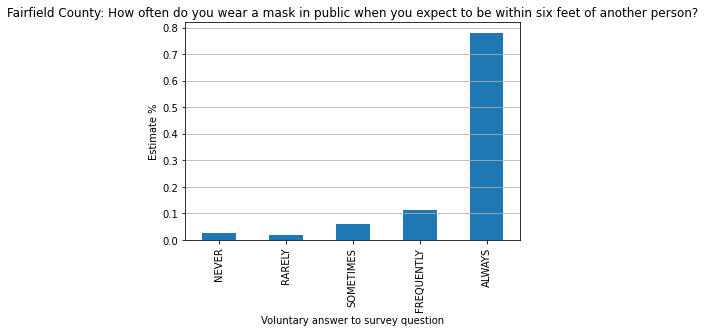

In [33]:
# bar chart of mask use in fairfield
fig = plt.figure(figsize = (25, 20))
ff_mask_use.T.plot(kind='bar')
plt.grid(axis='y')
plt.legend().remove()
plt.title('Fairfield County: How often do you wear a mask in public when you expect to be within six feet of another person?')
plt.ylabel('Estimate %')
plt.xlabel('Voluntary answer to survey question')

#### Calculate Rolling Averages

In [15]:
# calculate the rate of infection and the change in daily rate of infection 
# get the rolling average of confirmed cases and death
fairfield_population = 957419

ff_merged_unfiltered['population'] = fairfield_population

ff_merged_unfiltered['rolling_cc_avg'] = ff_merged_unfiltered['confirmed_cases'].rolling(window=7).mean()
ff_merged_unfiltered['rolling_cc_avg_diff'] = ff_merged_unfiltered['rolling_cc_avg'].diff()

ff_merged_unfiltered['population_at_risk'] = ff_merged_unfiltered['population'] - ff_merged_unfiltered['rolling_cc_avg']

ff_merged_unfiltered['daily_rate_of_infection'] = ff_merged_unfiltered['rolling_cc_avg_diff']/ ff_merged_unfiltered['population_at_risk']

# change in daily infection rate
ff_merged_unfiltered['change_in_daily_rate_of_infection'] = (ff_merged_unfiltered['daily_rate_of_infection'].diff()) * 100

# rolling average of COVID-related deaths
ff_merged_unfiltered['rolling_death_avg'] = ff_merged_unfiltered['death'].rolling(window=7).mean()

# keep only data from 2020-02-01 to 2021-10-15
mask = (ff_merged_unfiltered['date'] >= '2020-02-01') & (ff_merged_unfiltered['date'] <= '2021-10-15')
ff_merged_unfiltered = ff_merged_unfiltered.loc[mask]

ff_merged_unfiltered.tail(10)

,date,confirmed_cases,hosp_cases,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,...,Face_Masks_Required_in_Public,unemployment_rate,mask_required,population,rolling_cc_avg,rolling_cc_avg_diff,population_at_risk,daily_rate_of_infection,change_in_daily_rate_of_infection,rolling_death_avg
622,2021-10-06,74.0,37.0,70.9,668442.0,668274.0,82.3,610963.0,83.3,139214.0,...,NaN,NaN,0,957419,82.000000,-8.000000,957337.000000,-0.000008,-0.000627,1.571429
623,2021-10-07,92.0,38.0,70.9,668965.0,668797.0,82.4,611408.0,83.3,139273.0,...,NaN,NaN,0,957419,87.428571,5.428571,957331.571429,0.000006,0.001403,1.571429
624,2021-10-08,100.0,36.0,71.0,669951.0,669783.0,82.5,612264.0,83.5,139370.0,...,NaN,NaN,0,957419,77.571429,-9.857143,957341.428571,-0.000010,-0.001597,0.571429
625,2021-10-09,0.0,NaN,71.1,670549.0,670381.0,82.6,612796.0,83.5,139440.0,...,NaN,NaN,0,957419,77.571429,0.000000,957341.428571,0.000000,0.001030,0.571429
626,2021-10-10,0.0,NaN,71.1,671094.0,670926.0,82.6,613254.0,83.6,139495.0,...,NaN,NaN,0,957419,77.571429,0.000000,957341.428571,0.000000,0.000000,0.571429
627,2021-10-11,0.0,NaN,71.2,671797.0,671629.0,82.7,613844.0,83.7,139548.0,...,NaN,NaN,0,957419,51.142857,-26.428571,957367.857143,-0.000028,-0.002761,0.571429
628,2021-10-12,332.0,40.0,71.2,672101.0,671933.0,82.8,614096.0,83.7,139576.0,...,NaN,NaN,0,957419,85.428571,34.285714,957333.571429,0.000036,0.006342,0.142857
629,2021-10-13,53.0,52.0,71.3,672611.0,672443.0,82.8,614520.0,83.8,139627.0,...,NaN,NaN,0,957419,82.428571,-3.000000,957336.571429,-0.000003,-0.003895,0.428571
630,2021-10-14,159.0,52.0,71.4,673318.0,673150.0,82.9,615123.0,83.8,139696.0,...,NaN,NaN,0,957419,92.000000,9.571429,957327.000000,0.000010,0.001313,0.428571
631,2021-10-15,70.0,46.0,71.5,674134.0,673965.0,83.0,615821.0,83.9,139784.0,...,NaN,NaN,0,957419,87.714286,-4.285714,957331.285714,-0.000004,-0.001447,0.714286


In [16]:
# percent of fairfield county who are fully vaccinated
num_vax_people = ff_merged_unfiltered['Series_Complete_Yes'].max()
percent_of_fairfield_vax = (num_vax_people/fairfield_population) * 100
print (num_vax_people, "are fully vaccinated in Fairfield County ")
print (str(percent_of_fairfield_vax) + "% of Fairfield County residents are fully vaccinated")

674134.0 are fully vaccinated in Fairfield County 
70.41159617680451% of Fairfield County residents are fully vaccinated


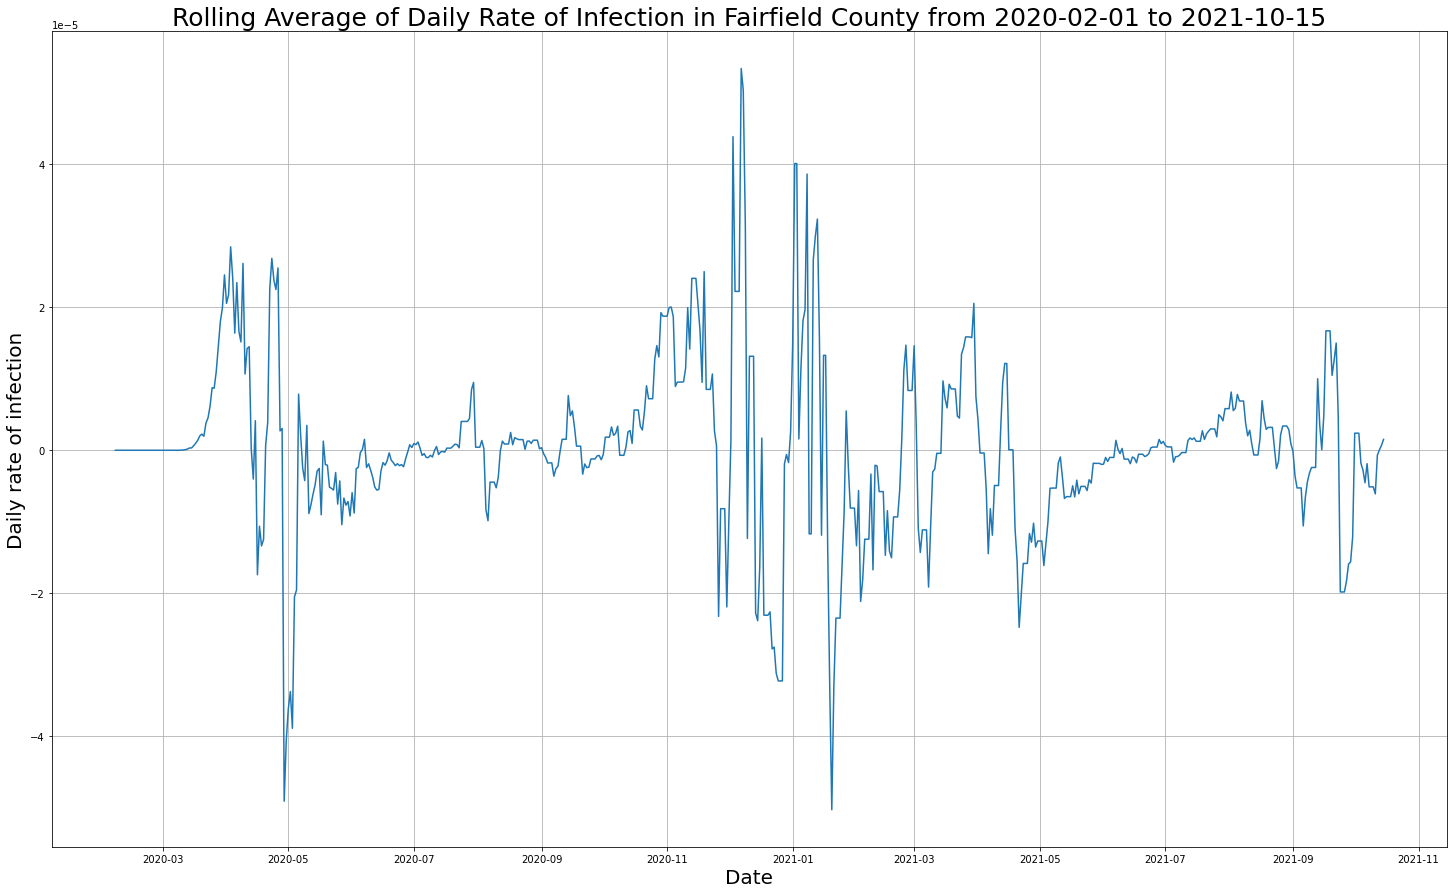

In [17]:
# visualize the daily rate of infection 

fig = plt.figure(figsize = (25, 15))

plt.plot(ff_merged_unfiltered['date'], ff_merged_unfiltered['daily_rate_of_infection'].rolling(window=7).mean())

plt.title("Rolling Average of Daily Rate of Infection in Fairfield County from 2020-02-01 to 2021-10-15", fontsize=25)
plt.xlabel("Date", fontsize=20)
plt.ylabel("Daily rate of infection", fontsize=20)

plt.grid()

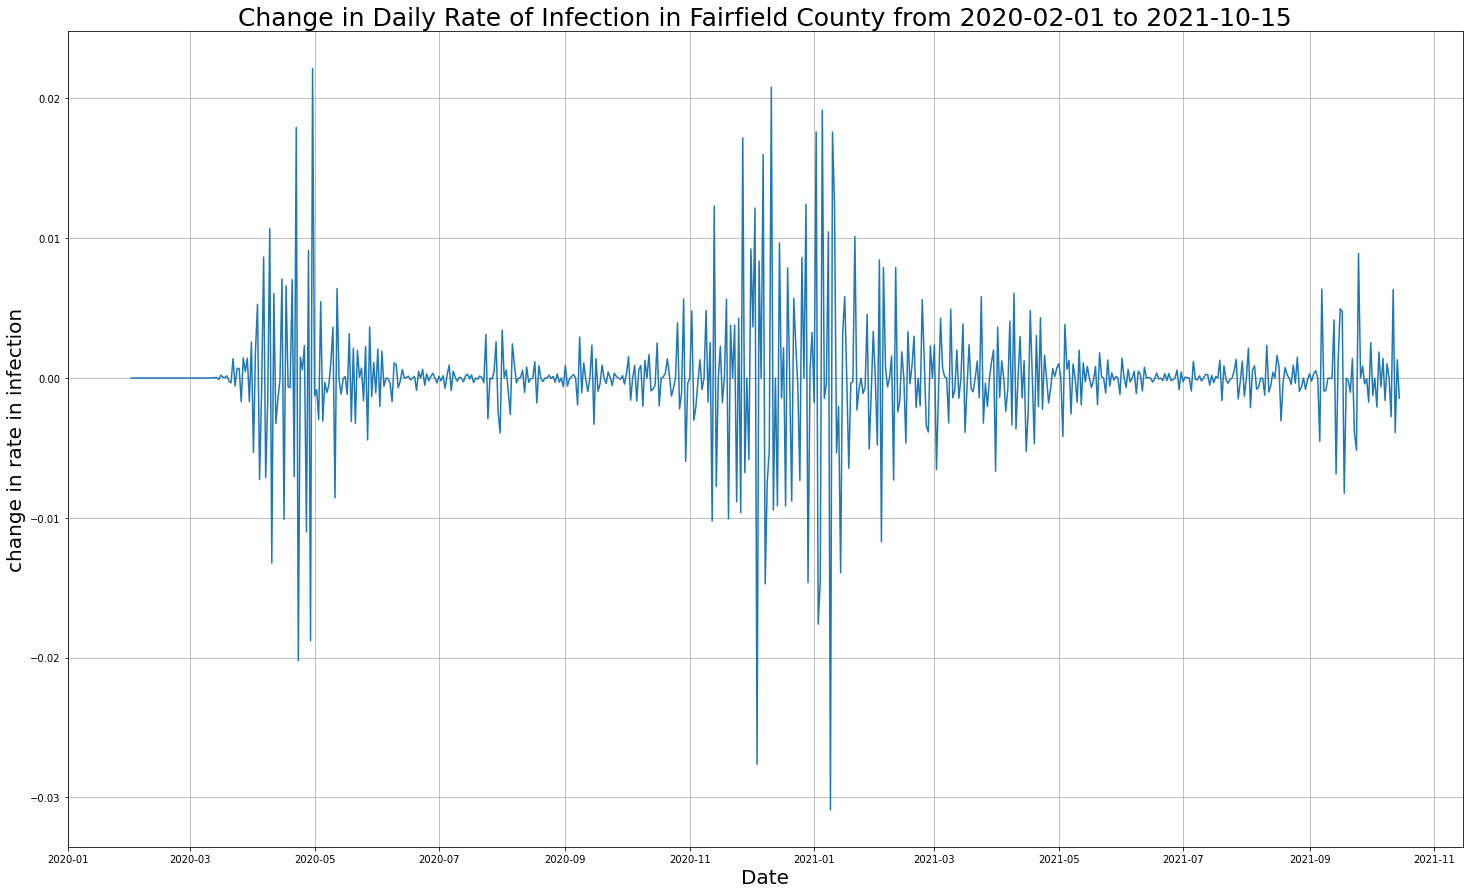

In [18]:
fig = plt.figure(figsize = (25, 15))

plt.plot(ff_merged_unfiltered['date'], ff_merged_unfiltered['change_in_daily_rate_of_infection'])

plt.title("Change in Daily Rate of Infection in Fairfield County from 2020-02-01 to 2021-10-15", fontsize=25)
plt.xlabel("Date", fontsize=20)
plt.ylabel("change in rate in infection", fontsize=20)

plt.grid()

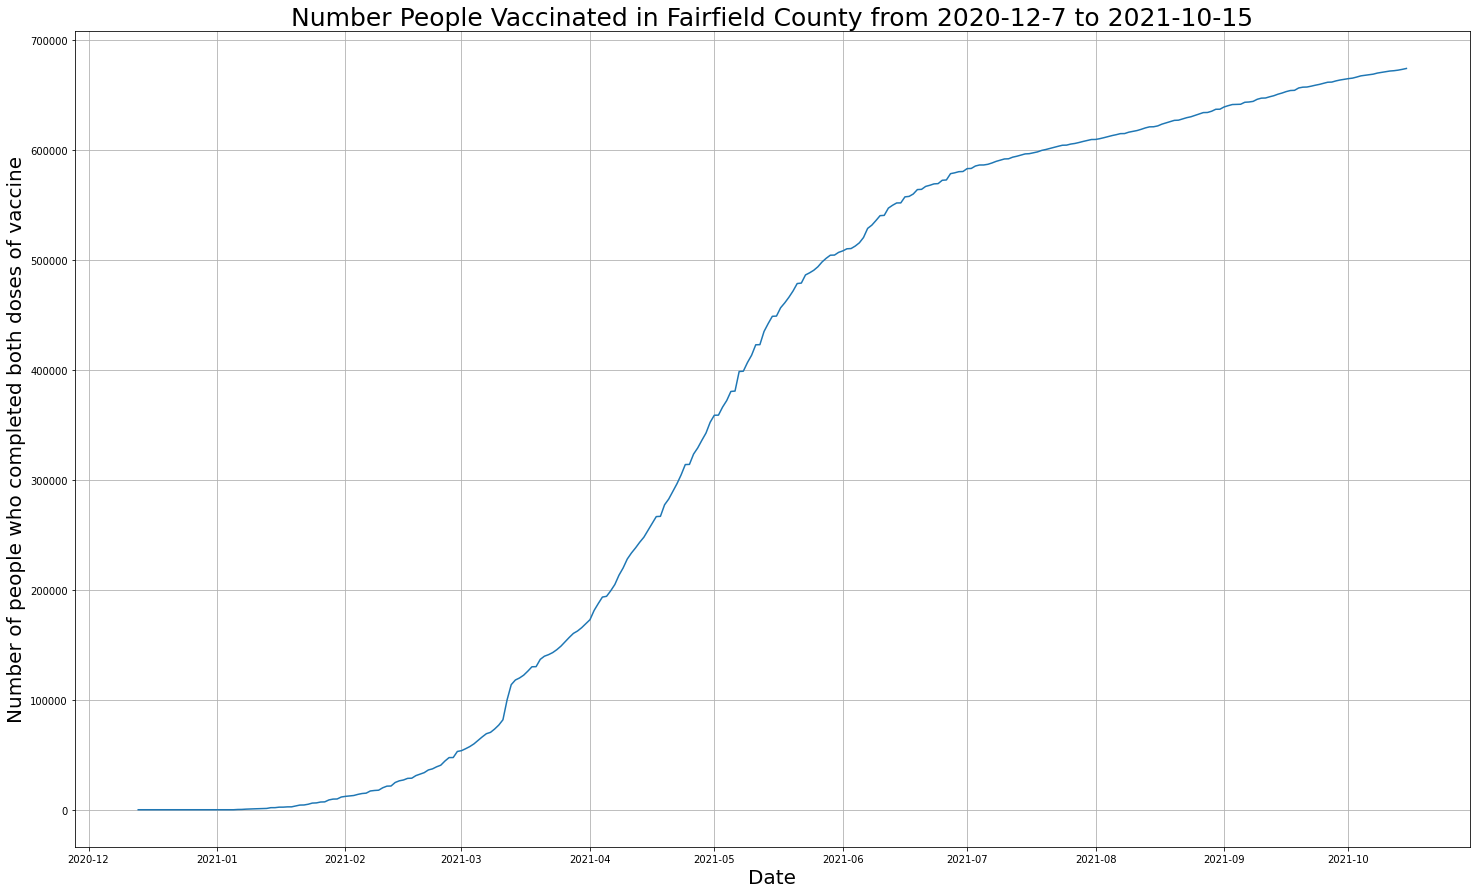

In [19]:
# visualize the vaccination in fairfield 
fig = plt.figure(figsize = (25, 15))

plt.plot(ff_merged_unfiltered['date'], ff_merged_unfiltered['Series_Complete_Yes'])

plt.title("Number People Vaccinated in Fairfield County from 2020-12-7 to 2021-10-15", fontsize=25)
plt.xlabel("Date", fontsize=20)
plt.ylabel("Number of people who completed both doses of vaccine", fontsize=20)

plt.grid()

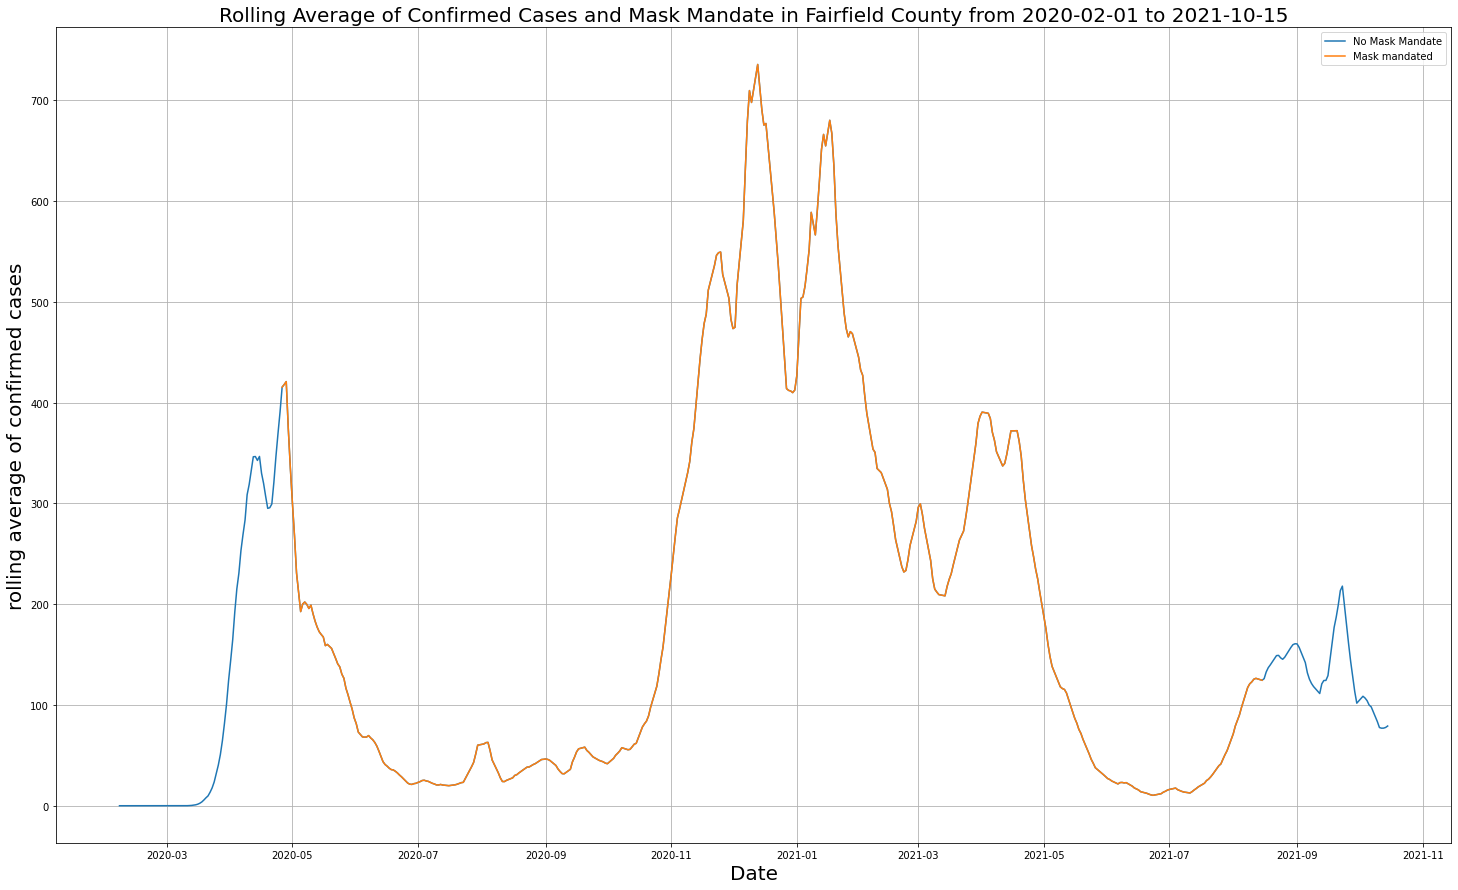

In [20]:
# visualize confirmed covid cases with and without mask mandates
fig = plt.figure(figsize = (25, 15))

plt.plot(ff_merged_unfiltered['date'], ff_merged_unfiltered['rolling_cc_avg'].rolling(window=7).mean()
        , label= 'No Mask Mandate')

plt.plot(ff_merged_unfiltered.loc[ff_merged_unfiltered['Face_Masks_Required_in_Public'] == 'Yes', 'date'], 
         ff_merged_unfiltered.loc[ff_merged_unfiltered['Face_Masks_Required_in_Public'] == 'Yes', 'rolling_cc_avg'].rolling(window=7).mean(), 
         label = 'Mask mandated')


plt.title("Rolling Average of Confirmed Cases and Mask Mandate in Fairfield County from 2020-02-01 to 2021-10-15", fontsize=20)
plt.xlabel("Date", fontsize=20)
plt.ylabel("rolling average of confirmed cases", fontsize=20)
plt.legend()

plt.grid()

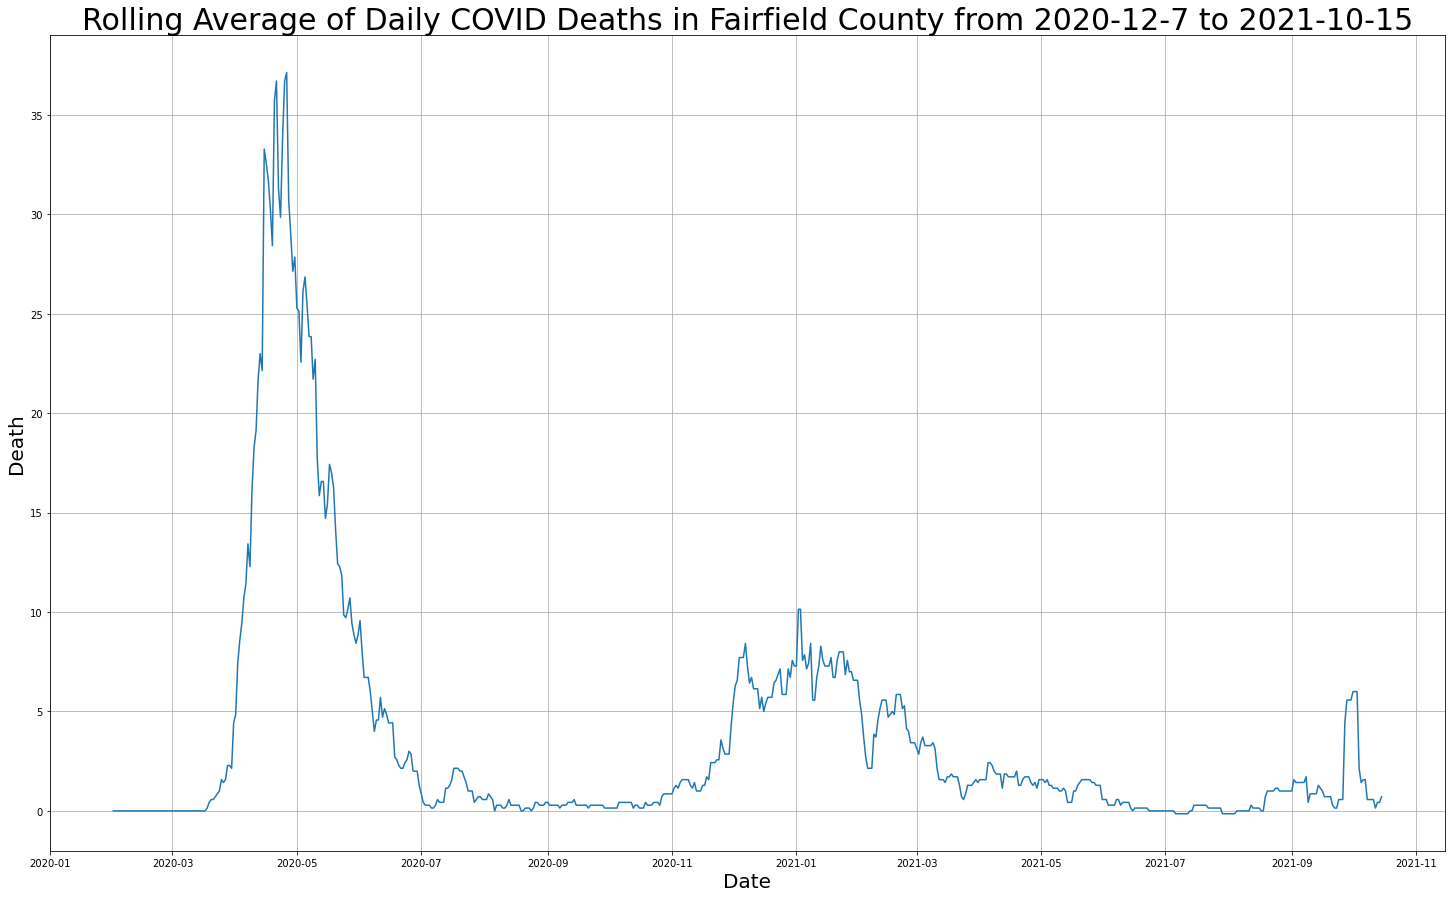

In [21]:
# visualize rolling average of death
fig = plt.figure(figsize = (25, 15))

plt.plot(ff_merged_unfiltered['date'], ff_merged_unfiltered['rolling_death_avg'])

plt.title("Rolling Average of Daily COVID Deaths in Fairfield County from 2020-12-7 to 2021-10-15", fontsize=30)
plt.xlabel("Date", fontsize=20)
plt.ylabel("Death", fontsize=20)

plt.grid()

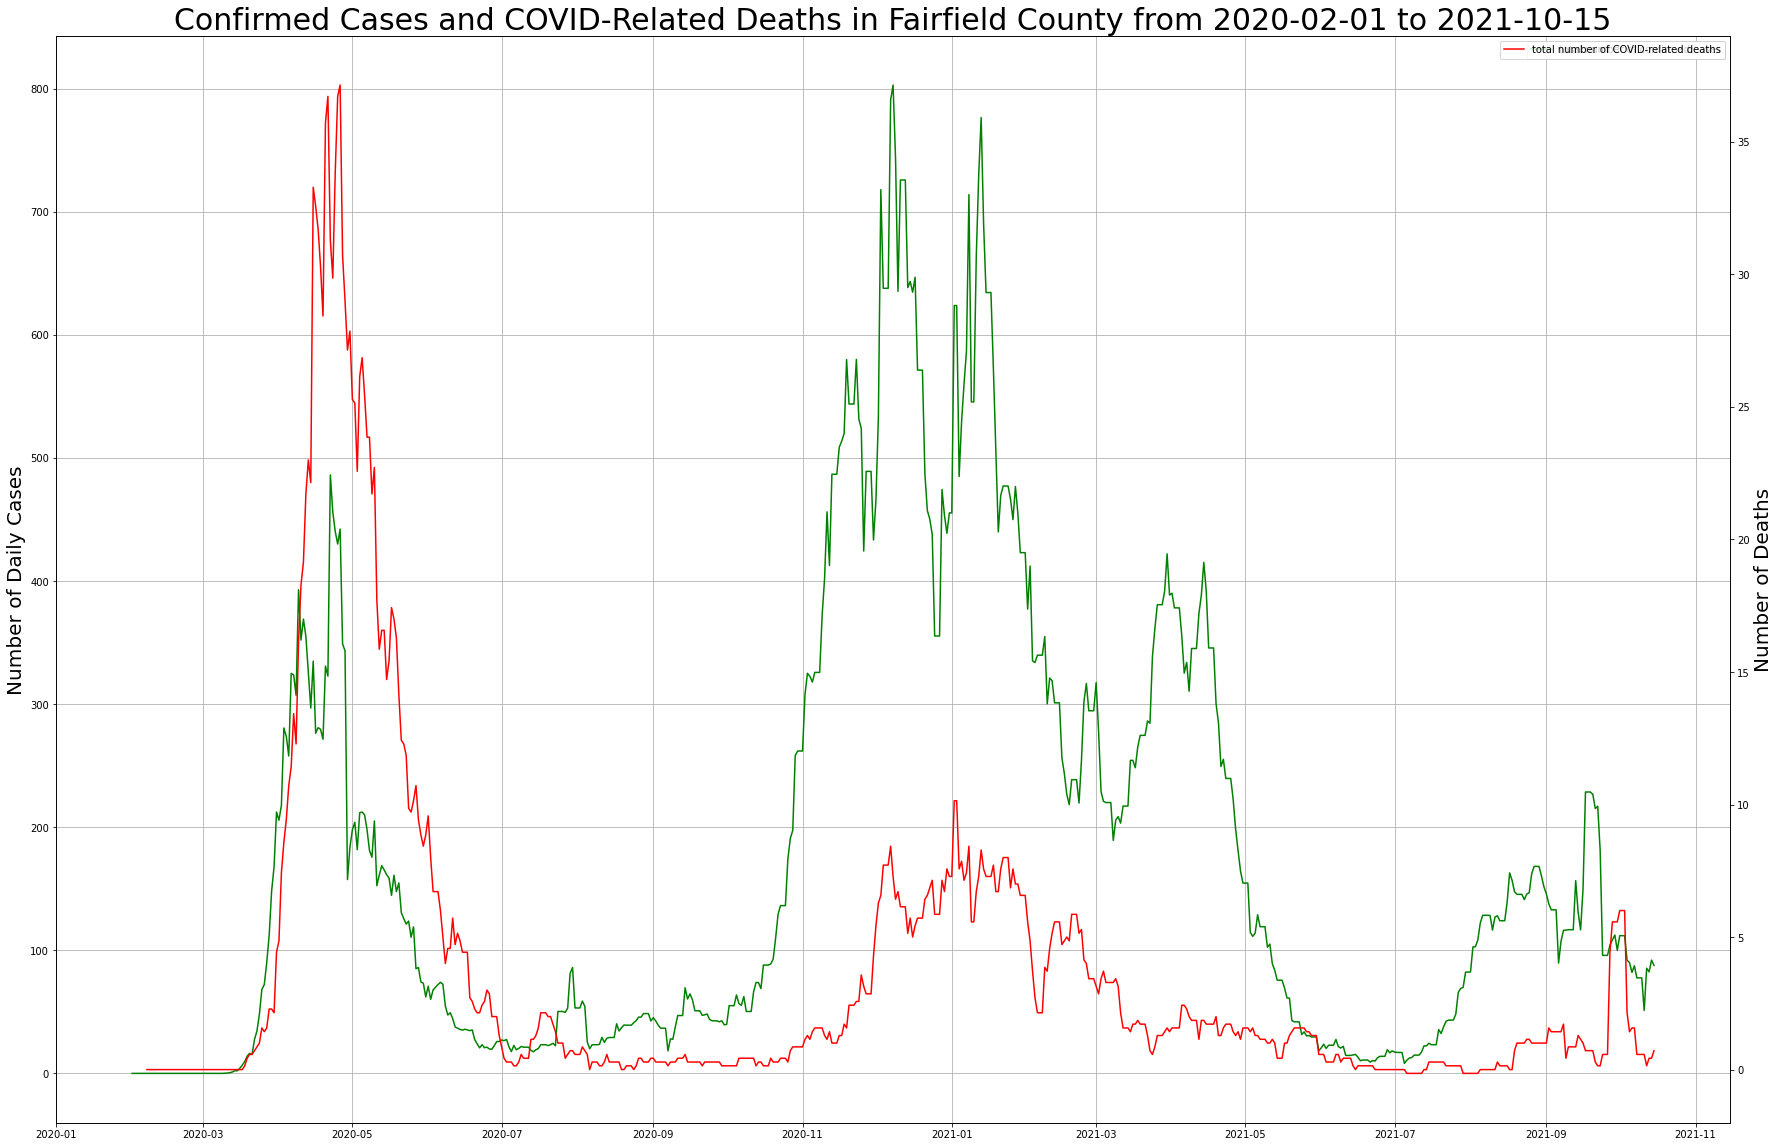

In [22]:

plt.figure(figsize=(30,20))
ax = plt.gca()
ax2 = ax.twinx()

ff_merged_unfiltered['rolling_death_avg'] = ff_merged_unfiltered['death'].rolling(window=7).mean()

ax.plot('date', 'rolling_cc_avg', 'g', data=ff_merged_unfiltered, label='total number of confirmed cases')
ax2.plot('date', 'rolling_death_avg', 'r', data=ff_merged_unfiltered, label='total number of COVID-related deaths')

plt.title('Confirmed Cases and COVID-Related Deaths in Fairfield County from 2020-02-01 to 2021-10-15', fontsize=30)
plt.xlabel('Date', fontsize=14)
ax.set_ylabel('Number of Daily Cases', fontsize=20)
ax2.set_ylabel('Number of Deaths', fontsize=20)

ax.grid()
ax.legend()
ax2.legend()

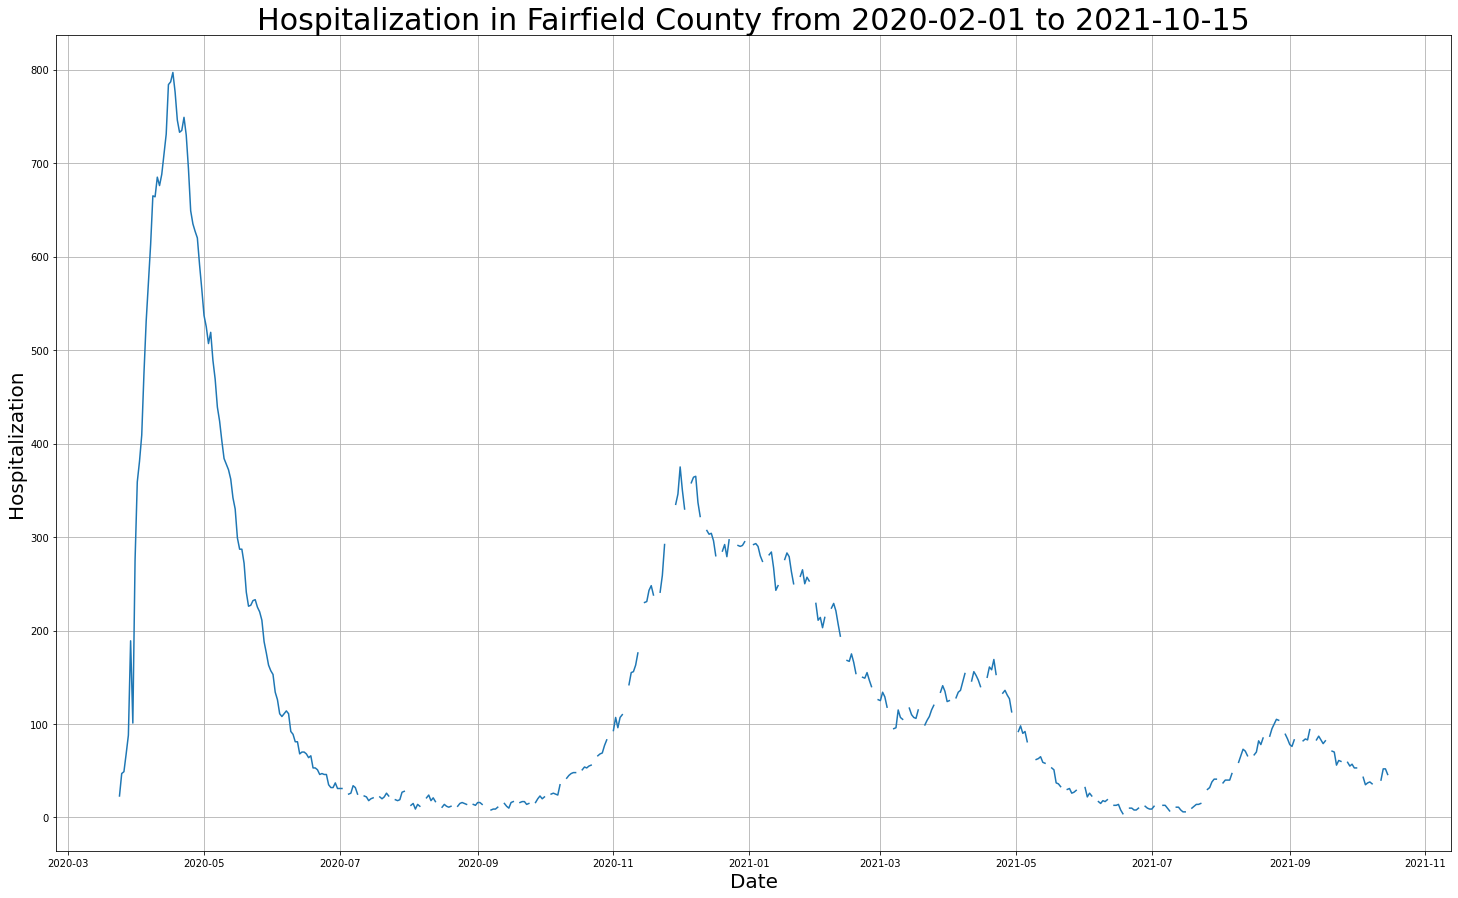

In [23]:
# visualize hospitalization
fig = plt.figure(figsize = (25, 15))

plt.plot(ff_merged_unfiltered['date'], ff_merged_unfiltered['hosp_cases'])

plt.title("Hospitalization in Fairfield County from 2020-02-01 to 2021-10-15", fontsize=30)
plt.xlabel("Date", fontsize=20)
plt.ylabel("Hospitalization", fontsize=20)

plt.grid()

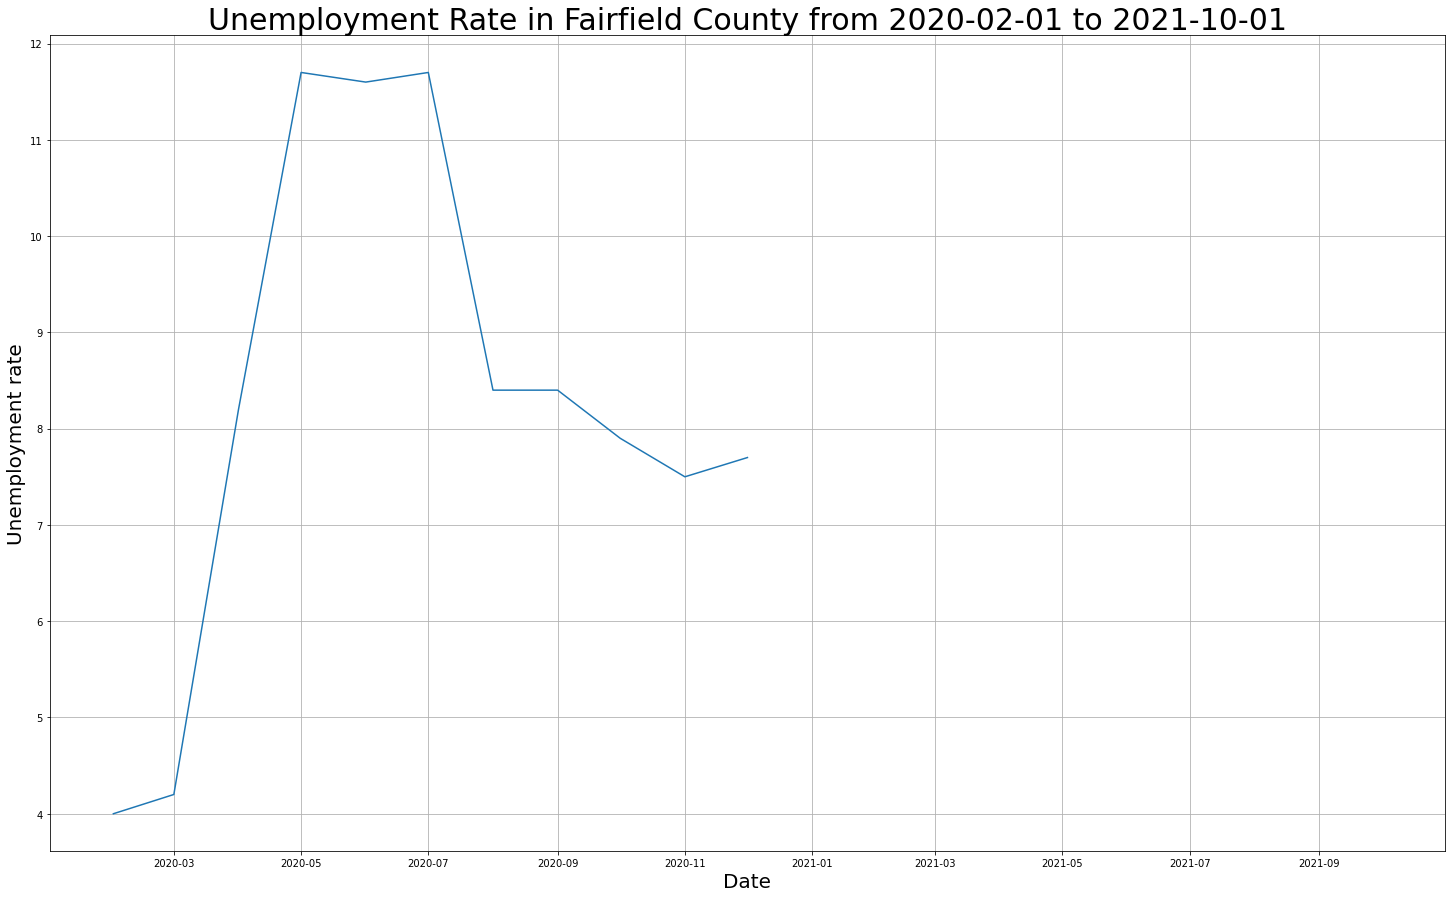

In [24]:
fig = plt.figure(figsize = (25, 15))

plt.plot(ff_merged['date'], ff_merged['unemployment_rate'])

plt.title("Unemployment Rate in Fairfield County from 2020-02-01 to 2021-10-01",fontsize=30)
plt.xlabel("Date", fontsize=20)
plt.ylabel("Unemployment rate", fontsize=20)

plt.grid()

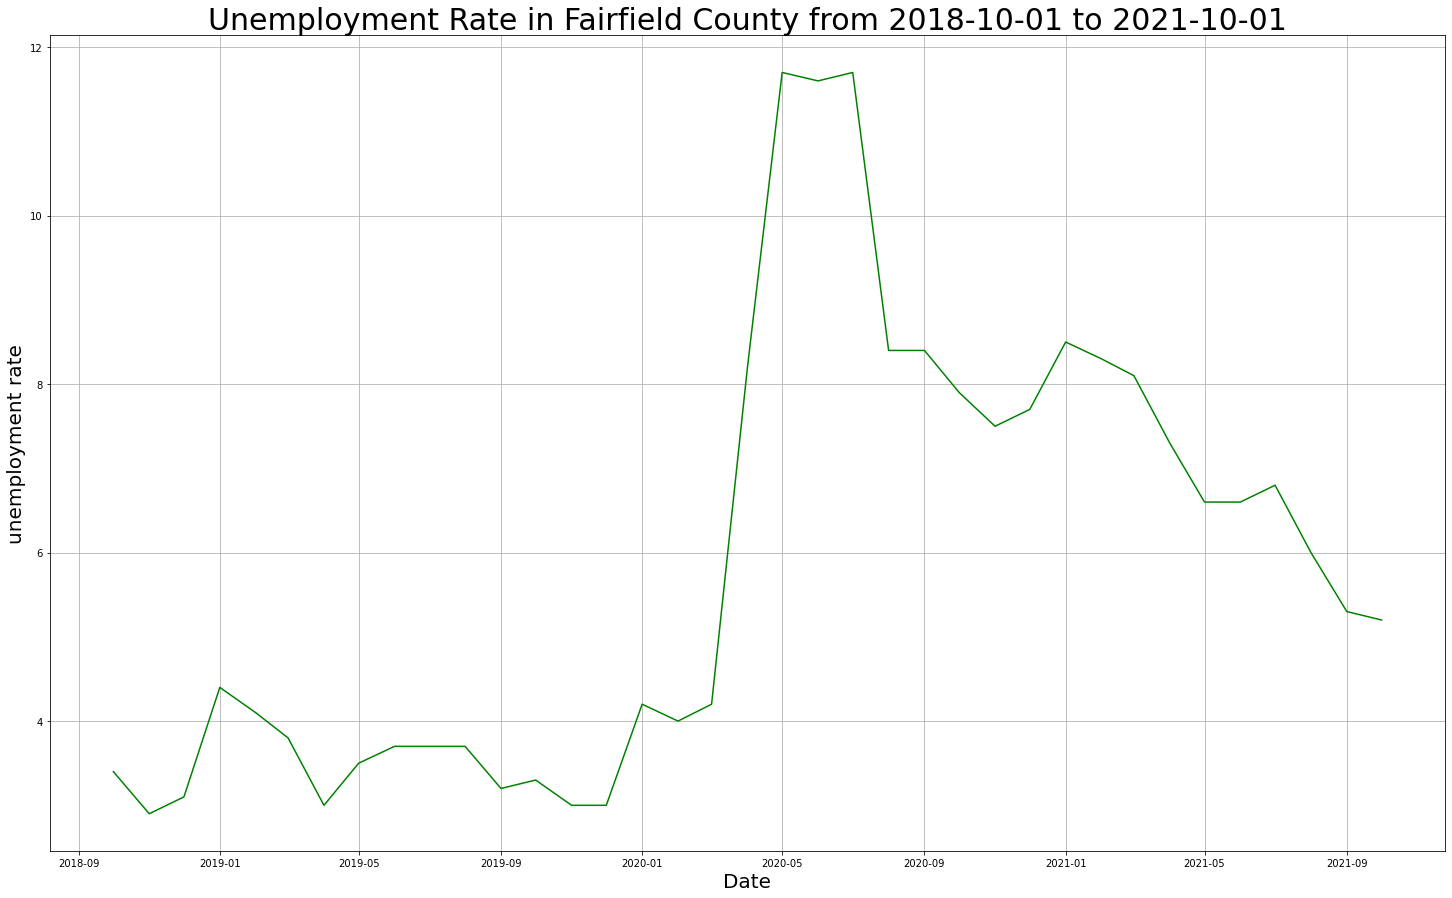

In [25]:
fig = plt.figure(figsize = (25, 15))

unemployment_pre_post_covid = pd.read_csv('raw_data/ff_unemployment_rate.csv')
unemployment_pre_post_covid['DATE'] = pd.to_datetime(unemployment_pre_post_covid['DATE'])

plt.plot(unemployment_pre_post_covid['DATE'], unemployment_pre_post_covid['CTFAIR1URN'], c='g')

plt.title("Unemployment Rate in Fairfield County from 2018-10-01 to 2021-10-01",fontsize=30)
plt.xlabel("Date", fontsize=20)
plt.ylabel("unemployment rate", fontsize=20)

plt.grid()

### Write out clean data

In [26]:
# write out clean data to 
ff_cc.to_csv('clean_data/ff_cc.csv', index=False)
ff_vaccination.to_csv('clean_data/ff_vaccination.csv', index=False)
ff_death.to_csv('clean_data/ff_death.csv', index=False)
ff_hosp.to_csv('clean_data/ff_hosp.csv', index=False)
ff_merged.to_csv('clean_data/ff_merged_filtered.csv', index=False)
ff_merged_unfiltered.to_csv('clean_data/ff_merged_unfiltered.csv', index=False)